In [1]:
%matplotlib inline

import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import glob
import itertools

In [2]:
def weights(N, seed=0):
    random = np.random.RandomState(seed)
    W = random.rand(N, N)
    W = (W + W.T) / 2  # symmetrically
    W *= (1 - np.eye(N))  # zero diagonal
    return W

In [38]:
def energy(s, w):
    return -0.5 * (np.outer(s, s) * w).sum()

def local_energy(s, w, i):
    return -0.5 * (s[i] * s * w[i]).sum()

def find_candidate(s, random):
    i = random.randint(0, s.shape[0])
    candidate = s.copy()
    candidate[i] *= -1
    return i, candidate

def maybe_flip(s, candidate, i, w, beta, random):
    difference = -2 * local_energy(s, w, i)
    probability = 1 / (1 + np.e ** (beta * difference))
    return [s, candidate][random.rand() < probability]

def simulated_annealing(weights, beta, tau, t_max, m=1, seed=0):
    random = np.random.RandomState(seed)
    n = weights.shape[0]
    s = np.array([-1, 1])[random.randint(0, 2, n)]
    costs = [energy(s, w)]
    for t in range(t_max):
        for _ in range(m):
            i, candidate = find_candidate(s, random)
            s = maybe_flip(s, candidate, i, w, beta, random)
        costs.append(energy(s, w))
        beta *= tau
    return s, costs


M=500 Result -8.34157189151
M=1 Result -8.34157189151


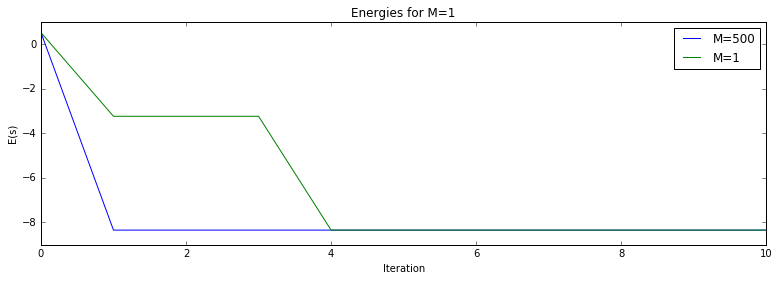

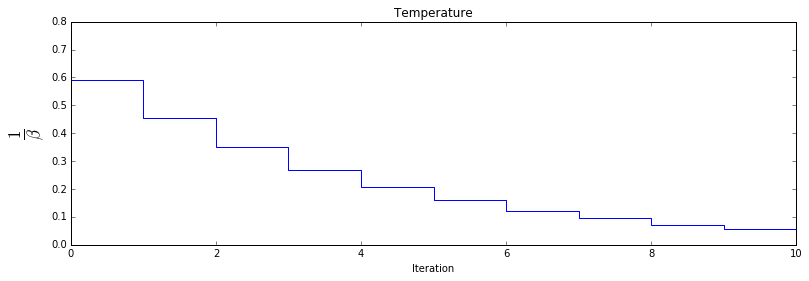

In [41]:
fig, ax = plt.subplots(figsize=(13, 4))
ax.set_title('Energies for M={}'.format(m))
ax.set_xlabel('Iteration')
ax.set_ylabel('E(s)')

w, t_max, beta, tau = weights(6), 10, 1.3, 1.3
for m in (500, 1):
    _, costs = simulated_annealing(w, beta, tau, t_max, m)
    print('M={} Result'.format(m), costs[-1])
    ax.plot(np.linspace(0, t_max, len(costs)), costs, label='M={}'.format(m))

ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(13, 4))
ax.set_title('Temperature')
ax.set_xlabel('Iteration')
ax.set_ylabel(r'$\frac{1}{\beta}$', fontsize=24)
betas = [beta]
for _ in range(t_max):
    betas.append(tau * betas[-1])
temps = [1 / x for x in betas]
ax.step(np.arange(len(temps)), temps)
plt.show()

In [5]:
states = itertools.permutations((-1, 1), 6)
